In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes

In [9]:
plt.rcParams['figure.dpi'] = 140
sns.set(font='IPAGothic')

df = pd.read_csv('ecom_cosmetics_cart_purchase_labels.csv')
df = df[df['purchased'] == 1]

In [10]:
from lifetimes.utils import summary_data_from_transaction_data
summary_df = summary_data_from_transaction_data(
df,
'user_id',
'event_time')

from lifetimes import BetaGeoFitter

bgf_model = BetaGeoFitter(penalizer_coef=0.0)

bgf_model.fit(summary_df['frequency'],
             summary_df['recency'],
             summary_df['T'])

<lifetimes.BetaGeoFitter: fitted with 43397 subjects, a: 0.15, alpha: 29.65, b: 0.68, r: 0.27>

<AxesSubplot:title={'center':'将来の購入見込数'}, xlabel='購入日数', ylabel='年齢(最初に購入してから現在までの日数)'>

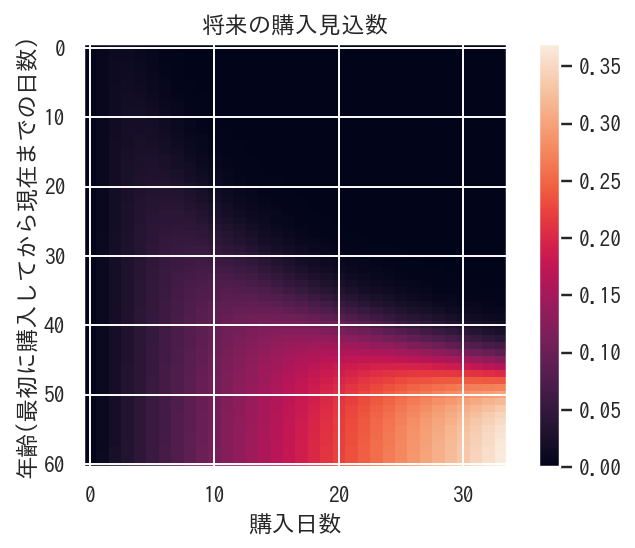

In [11]:
import matplotlib
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf_model,
                                 title="将来の購入見込数",
    xlabel="購入日数",
    ylabel="年齢(最初に購入してから現在までの日数)")

In [12]:
t = 7
summary_df['predicted_purchases'] = bgf_model.predict(t,
                                                     summary_df['frequency'],
                                                     summary_df['recency'],
                                                     summary_df['T'])
summary_df.sort_values(by='predicted_purchases').tail(1)

,frequency,recency,T,predicted_purchases
user_id,,,,
150318419,33.0,56.0,57.0,2.653827


<AxesSubplot:title={'center':'生存率'}, xlabel='購入日数', ylabel='日齢（最初に購入してから現在までの日数）'>

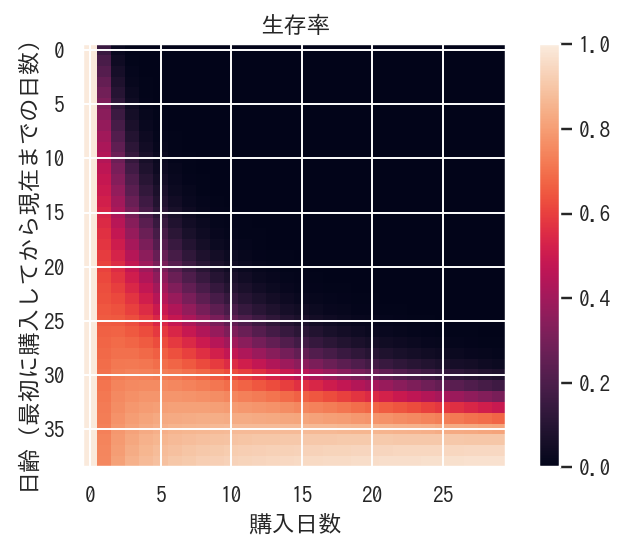

In [19]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf_model,
                             title='生存率',
                             xlabel='購入日数',
                             ylabel='日齢（最初に購入してから現在までの日数）')

In [23]:
from lifetimes.datasets import load_cdnow_summary_data_with_monetary_value
summary_with_money_value = load_cdnow_summary_data_with_monetary_value()
returning_customers_summary = summary_with_money_value[summary_with_money_value['frequency']>0]

from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0)
ggf.fit(
    returning_customers_summary['frequency'],
    returning_customers_summary['monetary_value'])
bgf_model.fit(
    summary_with_money_value['frequency'],
       summary_with_money_value['recency'],
       summary_with_money_value['T'])

print(ggf.customer_lifetime_value(
bgf_model,
summary_with_money_value['frequency'],
summary_with_money_value['recency'],
summary_with_money_value['T'],
summary_with_money_value['monetary_value'],
time=12,
discount_rate=0.01).head(10))

customer_id
1      140.096218
2       18.943466
3       38.180575
4       38.180575
5       38.180575
6     1003.868285
7       28.109681
8       38.180575
9      167.418224
10      38.180575
Name: clv, dtype: float64
